In [74]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

from datetime import timedelta

In [75]:
df = pd.read_csv('Commute - NH - Boston.csv')
df.head()

,date,depart_time,travel_time_min,travel_time_max,color,route
0,2022-09-12,5:00 AM,1h25,1h50,green,route 3
1,2022-09-12,5:00 AM,1h40,2h10,green,93
2,2022-09-13,5:00 AM,1h40,2h20,green,93
3,2022-09-13,5:00 AM,1h30,2h20,green,route 3
4,2022-09-14,5:00 AM,1h30,2h,green,route 3


In [76]:
# Convert travel times to minutes
def convert_to_minutes(s):
    s = s.split('h')
    mins = float(s[0])*60
    if s[1]:
        mins += float(s[1])
    return mins

df['travel_time_min_minutes'] = df['travel_time_min'].apply(lambda x: convert_to_minutes(x))
df['travel_time_max_minutes'] = df['travel_time_max'].apply(lambda x: convert_to_minutes(x))

# Calculate estimated arrivals
df['depart_datetime'] = pd.to_datetime(df['date'] + ' ' + df['depart_time'])
df['arrival_time_min'] = df.apply(
    lambda row: row['depart_datetime'] + timedelta(minutes=row['travel_time_min_minutes']), 
    axis=1
)
df['arrival_time_max'] = df.apply(
    lambda row: row['depart_datetime'] + timedelta(minutes=row['travel_time_max_minutes']), 
    axis=1
)


In [ ]:
df['depart_datetime_nodate'] = df['depart_datetime'].apply(lambda d: d.replace(year=2022, month=9, day=8))
df['arrival_time_max_nodate'] = df['arrival_time_max'].apply(lambda d: d.replace(year=2022, month=9, day=8))

(738406.1875, 738406.4166666666)

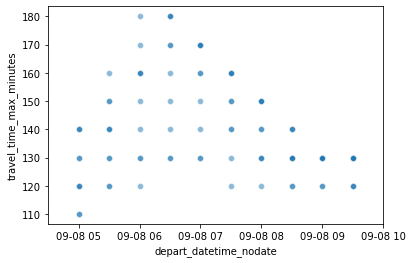

In [90]:
ax = sns.scatterplot(data=df, x='depart_datetime_nodate', y='travel_time_max_minutes', alpha=0.5)
ax.set_xlim([pd.to_datetime('2022-09-08 04:30:00'), pd.to_datetime('2022-09-08 10:00:00')])


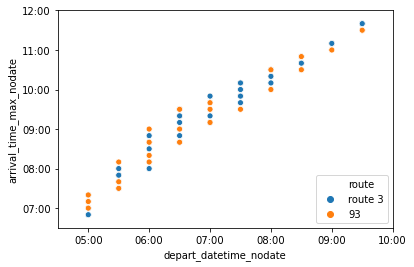

In [81]:
ax = sns.scatterplot(
    data=df, x='depart_datetime_nodate', y='arrival_time_max_nodate',
    hue='route'
)

ax.set_xlim([pd.to_datetime('2022-09-08 04:30:00'), pd.to_datetime('2022-09-08 10:00:00')])
ax.set_ylim([pd.to_datetime('2022-09-08 06:30:00'), pd.to_datetime('2022-09-08 12:00:00')])
ax.legend(loc='lower right')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

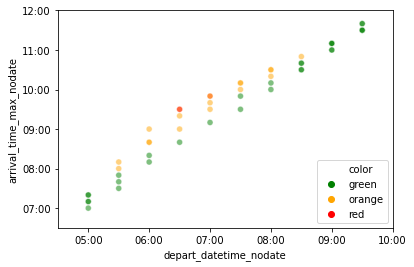

In [98]:
ax = sns.scatterplot(
    data=df.query('route == "93"'), x='depart_datetime_nodate', y='arrival_time_max_nodate',
    hue='color', alpha=0.5,
    palette={'red': 'red', 'green': 'green', 'orange': 'orange'}
)

ax.set_xlim([pd.to_datetime('2022-09-08 04:30:00'), pd.to_datetime('2022-09-08 10:00:00')])
ax.set_ylim([pd.to_datetime('2022-09-08 06:30:00'), pd.to_datetime('2022-09-08 12:00:00')])
ax.legend(loc='lower right')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

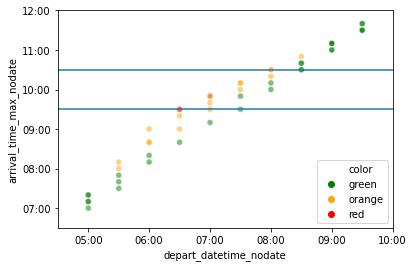

In [103]:
ax = sns.scatterplot(
    data=df.query('route == "93"'), x='depart_datetime_nodate', y='arrival_time_max_nodate',
    hue='color', alpha=0.5,
    palette={'red': 'red', 'green': 'green', 'orange': 'orange'}
)

ax.set_xlim([pd.to_datetime('2022-09-08 04:30:00'), pd.to_datetime('2022-09-08 10:00:00')])
ax.set_ylim([pd.to_datetime('2022-09-08 06:30:00'), pd.to_datetime('2022-09-08 12:00:00')])
ax.legend(loc='lower right')

ax.axhline(y=pd.to_datetime('2022-09-08 09:30:00'))
ax.axhline(y=pd.to_datetime('2022-09-08 10:30:00'))


ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

In [101]:
# Difference in max travel time between days
df.groupby('depart_time')['travel_time_max_minutes'].max() - df.groupby('depart_time')['travel_time_max_minutes'].min()

depart_time
5:00 AM    30.0
5:30 AM    40.0
6:00 AM    60.0
6:30 AM    50.0
7:00 AM    40.0
7:30 AM    40.0
8:00 AM    30.0
8:30 AM    20.0
9:00 AM    10.0
9:30 AM    10.0
Name: travel_time_max_minutes, dtype: float64


# Data collection

Manual

Estimates all seem quite low, from personal anecdotal experience these maximum travel times feel more like optimistic estimates - it often takes 30-45 min longer than the initial expected arrival time, sometimes up to 60 min longer.

So does the coloring - I would have expected many more of these time periods to be "red". Maybe that's reserved only for when Google knows that there's _currently_ an accident or other blockage?

# Results

Commuting between 5:30 am and 8:30 am puts you in the Boston traffic time warp: a period of  unpredictable and highly variable traffic, when leaving on a bad day gets you to Boston at the same time as leaving a full hour later but on a good day.

Outside of this time period, travel time to Boston is quite stable at around max two hours. But within the time period, the max travel time to Boston can get up to 3 hours depending on the day of the week. And that's not even counting accidents, road work, or whatever else doesn't go into Google's prediction algorithm! 

# Conclusion

To make the best use of my time, I should really try to leave home at 9. Usually though I end up leaving around 8 - this is sort of the balance point for me where I'm comfortable gambling on it being a good day (and thus getting to Boston early enough to enjoy a leisurely coffee), but not so early that if I get stuck in traffic I'll be very annoyed at all the time I wasted. Also, two and half hours doesn't feel too too bad for a commute in, but only because I don't do it very often. From this analysis, though, it does seem like leaving at 8:30 am is probably a better bet - I don'nt get to Boston that much later, but the day-to-day variability in my commute will be lower, thus leading to hopefully less frustration.

Anyway, I already mostly knew this - scheduling anything in Boston before 11 am is a gamble unless I'm willing to leave super early. I didn't really realize just how early I'd need to leave - I would have guess 6 am was fine but no, it's 5 am or bust.



- Range of times outside of these hours is so much tighter
- Difference between good days and bad days can be up to an hour (so unhelpful for planning!)
- If you want to miss traffic (no orange dots), leave before 5 am or after 9 am (meanning you have to arrive after 10:30 at the earliest)


tl'dr - leaving between 5:30 and 9 am means your commute is unpredictable and will likely suck

which means that getting into Boston between 7:30 am and 10:30 am sucks.

leaving at 7:30 am on a bad day means you arrive at the same time as leaving at 8:30 on a good day :sob:


Future work:
- ok, now do it but stop north of Medford